In [1]:
import tensorflow as tf 
import numpy as np
import PIL
import PIL.Image
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

import concept_gated_conv

2023-07-05 09:22:12.480083: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2023-07-05 09:22:15.758610: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22156 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090 Ti, pci bus id: 0000:17:00.0, compute capability: 8.6
2023-07-05 09:22:16.152160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]
2023-07-05 09:22:16.152574: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]


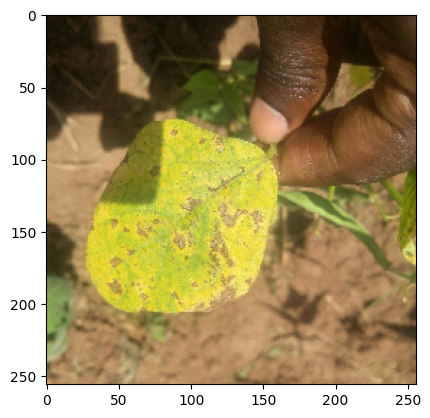

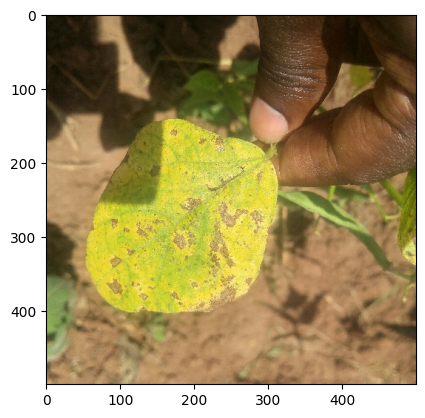

In [2]:
# loading the dataset
def bean_img_iter(bs = 32):
    img_size = (500, 500)
    
    dataset = tfds.load("beans", split='train', shuffle_files=True)
    dataset = dataset.batch(bs, drop_remainder=True, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.repeat()
    dataset = dataset.shuffle(1024, reshuffle_each_iteration=True)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return iter(dataset)

dsIter = bean_img_iter(8)
ds = next(dsIter)
dsImages = tf.image.resize(ds['image'], (256, 256)) 

plt.imshow(tf.cast(dsImages[1], dtype=tf.uint8))
plt.show()

plt.imshow(ds['image'][1])
plt.show()



In [3]:
import concept_gated_conv

In [4]:
cgae = concept_gated_conv.concept_gated_conv_ae()
opt = tf.keras.optimizers.AdamW(learning_rate=1e-4, global_clipnorm=1)
opt_steps = 5000

for step in range(opt_steps):
    def ae_loss():
        ds = tf.image.resize(next(dsIter)['image'], (256, 256)) 
        ds = (ds - 128.) / 256.
        ae_loss = tf.keras.losses.MeanSquaredError()(cgae(ds), ds)
        total_loss = ae_loss + tf.reduce_sum(cgae.losses)
        print(total_loss)
        return total_loss
    
    opt.minimize(loss=ae_loss, var_list=cgae.trainable_weights)


2023-07-05 09:22:20.748198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-05 09:22:20.915709: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-07-05 09:22:21.662797: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


tf.Tensor(4439436.5, shape=(), dtype=float32)


2023-07-05 09:22:25.390326: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0xbeffbc80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-05 09:22:25.390388: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2023-07-05 09:22:25.397085: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-05 09:22:25.463881: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-07-05 09:22:25.534829: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


tf.Tensor(1999953.9, shape=(), dtype=float32)
tf.Tensor(1396106.0, shape=(), dtype=float32)
tf.Tensor(970733.56, shape=(), dtype=float32)
tf.Tensor(832096.3, shape=(), dtype=float32)
tf.Tensor(452690.84, shape=(), dtype=float32)
tf.Tensor(383580.38, shape=(), dtype=float32)
tf.Tensor(242526.83, shape=(), dtype=float32)
tf.Tensor(182294.16, shape=(), dtype=float32)
tf.Tensor(144966.0, shape=(), dtype=float32)
tf.Tensor(105377.66, shape=(), dtype=float32)
tf.Tensor(89100.65, shape=(), dtype=float32)
tf.Tensor(59840.25, shape=(), dtype=float32)
tf.Tensor(50510.59, shape=(), dtype=float32)
tf.Tensor(45970.91, shape=(), dtype=float32)
tf.Tensor(28576.826, shape=(), dtype=float32)
tf.Tensor(18643.47, shape=(), dtype=float32)
tf.Tensor(20232.035, shape=(), dtype=float32)
tf.Tensor(14201.251, shape=(), dtype=float32)
tf.Tensor(13694.014, shape=(), dtype=float32)
tf.Tensor(11107.888, shape=(), dtype=float32)
tf.Tensor(8967.079, shape=(), dtype=float32)
tf.Tensor(6669.308, shape=(), dtype=float3